In [1]:
from libraries import *
from utils import *
%matplotlib inline

In [2]:
# i_po = '../../../project/wip/pix2pixHD-master/datasets/helen_/train_img'
# i_pc = '../../../project/wip/pix2pixHD-master/datasets/helen/train_img'

# i_pcl = '../../../project/wip/pix2pixHD-master/datasets/helen/train_label'
# i_pcll = glob(os.path.join(i_pcl, '*jpg')); print(len(i_pcll))

# for i in i_pcll:
#     f_name = i.split('/')[-1].split('.')[0].split('_cb')[0]
#     os.system('cp %s %s' %(os.path.join(i_po, f_name + '.png'), i_pc))


In [3]:
from math import*
from decimal import Decimal
 
class Similarity():
    """ Five similarity measures function """
 
    def euclidean_distance(self,x,y):
        """ return euclidean distance between two lists """
        
        return np.sqrt(np.sum((x - y)**2))
#         return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
 
    def manhattan_distance(self,x,y):
        """ return manhattan distance between two lists """
        
        return np.sum(abs(x - y)) 
#         return sum(abs(a-b) for a,b in zip(x,y))
 
    def minkowski_distance(self,x,y,p_value):
        """ return minkowski distance between two lists """
 
        return self.nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)), p_value)
#         return self.nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)), p_value)

    def nth_root(self,value, n_root):
 
        """ returns the n_root of an value """
 
        root_value = 1/float(n_root)
        return round (Decimal(value) ** Decimal(root_value),3)
 
    def cosine_similarity(self,x,y):
 
        """ return cosine similarity between two lists """
        numerator = np.sum(x - y)
        denominator = np.sqrt(x) * np.sqrt(y)
        return round(numerator/float(denominator), 3)
    
#         numerator = sum(a*b for a,b in zip(x,y))
#         denominator = self.square_rooted(x)*self.square_rooted(y)
#         return round(numerator/float(denominator), 3)
 
    def jaccard_similarity(self,x,y):
        """ returns the jaccard similarity between two lists """
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)
    
#         intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
#         union_cardinality = len(set.union(*[set(x), set(y)]))
#         return intersection_cardinality/float(union_cardinality)
        

In [4]:
i_otrain = '../../datasets/helen/output/trainset/preprocessed_labels'
# i_otest = '../../datasets/helen/output/testset/preprocessed_labels'
i_ctrain = '../../datasets/helen/output/trainset/clean'
# i_ctest = '../../datasets/helen/output/clean'

o_p = '../../datasets/helen/output/'

In [5]:
i_po = i_otrain # input path origial
i_pc = i_ctrain # input path clean

sample_size = None

# gather not cleaned images

i_formats = ['**/*.jpg', '**/*.JPG', '**/*.png']

o_pd = os.path.join(o_p, 'removed') # output path deleted
if not os.path.exists(o_p): os.makedirs(o_p)
else: print('Warning: "%s" folder already exists: adding files..' %o_p)

i_pol = reduce(operator.add, [glob(os.path.join(i_po, i), recursive=True) for i in i_formats], [])
i_pcl = reduce(operator.add, [glob(os.path.join(i_pc, i), recursive=True) for i in i_formats], [])

if not sample_size: sample_size = len(i_pol)
print('Total available images: %d' %len(i_pol))

i_pdl = []
# 
for i in i_pol[:sample_size]:
    f_name = i.split('/')[-1].split('.')[0]
    if len(glob(os.path.join(i_pc, f_name + '*'))) == 0: i_pdl.append(os.path.join(i_pc, f_name + '*'))
        
#     for j in i_pcl: 
#         print(f_name, j)
#         if f_name not in j: i_pdl.append(i)
# i_pdl = [i for i in i_pol[:sample_size] if any(i.split('/')[-1].split('.')[0]iscontained in j for j in i_pcl)]    

print(len(i_pol), len(i_pcl), len(i_pdl))

Total available images: 2000
2000 912 1088


In [6]:
sample_size = None
if not sample_size: sample_size = len(i_pol)

deuc_o = []
deuc_c = []
deuc_d = []

dman_o = []
dman_c = []
deuc_d = []

# simmetry loss
for i in i_pol[:sample_size]:
    f_name = i.split('/')[-1].split('.')[0]
    print('Processing file: %s' %i)
#   im = cv2.imread(i, cv2.IMREAD_UNCHANGED); print(im.shape)
    im = cv2.imread(i); print(im.shape)
    h1 = im[:im.shape[0], :int(im.shape[1]/2), :]
    h2 = im[:im.shape[0], int(im.shape[1]/2):, :]
    # flip h2
    h2f = np.fliplr(h2)
#     plot_im(h2f)
    
#     dists={}
#     dists['l2'] = Similarity().euclidean_distance(h1, h2f)
#     dists['l1'] = Similarity().manhattan_distance(h1, h2f)
#     dists['mnk'] = Similarity().minkowski_distance(h1, h2f, p_value)
#     dists['nth'] = Similarity().nth_root(value, n_roo)
#     dists['cos'] = Similarity().cosine_similarity(h1, h2f)
#     dists['sqt'] = Similarity().square_rooted(h1, h2f)
#     dists['jcc'] = Similarity().jaccard_similarity(h1, h2f)
    
#     for i,j in dists.items(): print(i, j)
    
    x, y = h1, h2f
    euc = np.sqrt(np.sum((x - y)**2))
    man = np.sum(abs(x - y)) 
    
    deuc_o.append(euc)
    dman_o.append(man)

    print(len(deuc_o), len(dman_o))

#     dist_euclidean = sqrt(sum((i1 - i2)^2)) / i1.size
#     dist_manhattan = sum(abs(i1 - i2)) / i1.size
#     dist_ncc = sum( (i1 - mean(i1)) * (i2 - mean(i2)) ) / ((i1.size - 1) * stdev(i1) * stdev(i2) )


# def mse(imageA, imageB):
# 	# the 'Mean Squared Error' between the two images is the
# 	# sum of the squared difference between the two images;
# 	# NOTE: the two images must have the same dimension
# 	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
# 	err /= float(imageA.shape[0] * imageA.shape[1])
	
# 	# return the MSE, the lower the error, the more "similar"
# 	# the two images are
# 	return err
 
# def compare_images(imageA, imageB, title):
# 	# compute the mean squared error and structural similarity
# 	# index for the images
# 	m = mse(imageA, imageB)
# 	s = ssim(imageA, imageB)
 
# 	# setup the figure
# 	fig = plt.figure(title)
# 	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
# 	# show first image
# 	ax = fig.add_subplot(1, 2, 1)
# 	plt.imshow(imageA, cmap = plt.cm.gray)
# 	plt.axis("off")
 
# 	# show the second image
# 	ax = fig.add_subplot(1, 2, 2)
# 	plt.imshow(imageB, cmap = plt.cm.gray)
# 	plt.axis("off")
 
# 	# show the images
# 	plt.show()

# simmetry loss
for i in i_pcl[:sample_size]:
    f_name = i.split('/')[-1].split('.')[0]
    print('Processing file: %s' %i)
#     im = cv2.imread(i, cv2.IMREAD_UNCHANGED); print(im.shape)
    im = cv2.imread(i); print(im.shape)
    h1 = im[:im.shape[0], :int(im.shape[1]/2), :]
    h2 = im[:im.shape[0], int(im.shape[1]/2):, :]
    # flip h2
    h2f = np.fliplr(h2)
    
    x, y = h1, h2f
    euc = np.sqrt(np.sum((x - y)**2))
    man = np.sum(abs(x - y)) 
    
    deuc_c.append(euc)
    dman_c.append(man)


print(len(deuc_c), len(dman_c))

Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2832087247_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2737646637_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2177168298_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2607971564_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2078249976_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2591957537_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2828057266_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/183204955_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2312507373_1_cb.png
(512, 512, 3)
Processing file: ../../datase

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2535719318_3_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1227072121_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2816846040_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2138851191_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/110890106_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2782094272_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/291888779_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2567215951_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2524358270_1_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/150766294_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1218567979_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2667636661_4_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/291541184_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1356888436_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/12799337_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2777541034_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2057113858_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2622481517_2_cb.png
(512, 512, 3)
Processing file: .

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2377409057_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2422195369_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2201942026_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/202516196_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2140513376_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2652089249_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2330955274_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2957223541_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2908244346_1_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2402745714_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2571812886_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2433671054_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2548364697_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2722611373_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/222388800_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2634041063_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2115806866_3_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2233737284_2_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2861948517_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/199718034_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2957533922_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2376488496_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2547808775_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2551040213_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2935679960_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2719464221_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/160565613_2_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/212515672_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2570966789_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2816884634_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/105455387_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2330955410_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2229778733_3_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2314301953_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2815337739_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/280470249_1_cb.png
(512, 512, 3)
Processing file: 

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/153057847_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2735836218_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/13653802_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2224610174_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/111247636_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2410521422_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/146623854_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2191423425_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2536681755_2_cb.png
(512, 512, 3)
Processing file: ..

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1861796452_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2356460241_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2667636661_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/237609290_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2831214703_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2081777014_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2430664591_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2366695522_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1878818683_1_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1440954875_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2085165542_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2344967158_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/198386414_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2744427984_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2081258704_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2535719318_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2842060169_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1271089376_1_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2352345861_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2719469475_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2652890824_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2109755281_4_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2915550024_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/117932364_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2781323593_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2536832392_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1407641926_1_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2584226946_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1263447841_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2125467698_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1657180938_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2724831350_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/151905797_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2397587931_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2308489181_3_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2947090433_1_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2917514517_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1409035501_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2533221503_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2401967202_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/277485584_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2182951022_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1418178512_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2201943712_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/243214217_1_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/140606432_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2167135339_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2082180458_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/118736733_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1199742157_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1412970826_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2436151978_3_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/164866565_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2397601939_1_cb.png
(512, 512, 3)
Processing file: 

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2124708927_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1426553012_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1541108261_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2140556694_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2707641297_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2739463536_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2066420581_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/221278406_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2620035751_8_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2678543215_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2541112439_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/231216392_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2943361594_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2554718441_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2620035751_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2100608030_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2205474871_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2139663057_2_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2716694520_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/173744986_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2741148975_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2861948045_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1425648903_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2405801774_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2851029498_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/117634057_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2116626844_2_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2137551460_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/146978430_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2546515404_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/200748267_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1328530642_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2622481529_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2525905984_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2809588534_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2756841760_1_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1710672384_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/241618266_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1063957157_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2113106881_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1429860583_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2167059698_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2096196849_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2233250688_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2091918525_1_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2276629742_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2099144186_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2726369211_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2446496284_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2083040467_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2330129299_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/26041966_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2477958141_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1394430375_1_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2070105355_5_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/243232372_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2392191492_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2942017513_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2425505427_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2201151487_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2250199357_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2579350496_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/203328057_1_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2612796933_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2877095014_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2609134545_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2553964820_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/144402621_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2830081484_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2721866884_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2643601988_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/295960450_1_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2826630965_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2537969929_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2719469639_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2076592686_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/209833308_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2057899604_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2572176925_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2204494382_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2138195672_1_cb.png
(512, 512, 3)
Processing file

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/180986261_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2927565564_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/100040721_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/21582960_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2559502581_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2500920400_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/154598718_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/147226455_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2662367038_1_cb.png
(512, 512, 3)
Processing file: ../

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2411561802_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2465033947_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2861015002_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2383880067_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2583756661_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2853873126_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/167671301_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/106326063_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2195220502_1_cb.png
(512, 512, 3)
Processing file:

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2941961941_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1344739819_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2702543812_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/20315024_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1436253170_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2325274893_2_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/17192052_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/21161074_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/1238081332_1_cb.png
(512, 512, 3)
Processing file: ../

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/252976245_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2497794830_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2432854845_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2401359779_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2358209574_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2589513472_1_cb.png
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/preprocessed_labels/2879550020_1_cb.png
(512, 512, 3)
2000 2000
Processing file: ../../datasets/helen/output/trainset/clean/1629243_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/10405424_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/206283602_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/206413799_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/206448817_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/206907073_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/206907279_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/209833308_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/212409770_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/212960843_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/213033315_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/213034733_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/cl

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1198061571_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1218567979_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1218567979_3_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1220825867_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1223190031_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1234292822_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1238081332_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1240101737_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1259817140_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1263447841_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1563845683_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1571181976_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1571340973_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1586174785_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1589999087_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1599258772_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1613734064_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1620560362_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1657179414_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/1698375922_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2091682510_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2091990193_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2092281650_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2093465867_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2093746851_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2093747255_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2094505527_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2096196849_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2097991401_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2097991401_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2173271902_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2180195389_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2182951022_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2184781988_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2185205964_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2185205964_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2189567066_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2190740171_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2190903226_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2191376922_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2298271312_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2301024765_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2302240607_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2304715356_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2306258846_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2308489181_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2308648441_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2312507373_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2313830319_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2315541918_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2398724424_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2352307187_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2398726534_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2352345861_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2402052185_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2352531093_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2402745714_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2352534555_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2404966827_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2354287692_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2536015971_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2536681755_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2536832392_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2540799498_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2541112439_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2544738096_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2544906205_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2545132994_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2547808775_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2548725859_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2711926644_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2719464221_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2719467991_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2720293102_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2720792426_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2721024227_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2721311052_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2721527391_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2722611373_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2722625419_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2896253715_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2898256824_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2898498038_3_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2899042869_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2906597545_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2908244346_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2912595996_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2915550024_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2917514517_1_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/trainset/clean/2921367538_2_cb.jpg
(512, 512, 3)
Processing file: ../../datasets/helen/output/t

In [22]:
print(np.mean(deuc_o), np.mean(dman_o))
print(np.std(deuc_c), np.std(dman_c))

print(np.mean(deuc_o), np.mean(deuc_c))
print(np.mean(dman_o), np.mean(dman_c))

5303.19515455 43273974.52
394.082041476 11431842.4288
5303.19515455 5287.31397927


In [ ]:
# import numpy as np
# import pandas as pd
# from scipy import stats, integrate
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(color_codes=True)

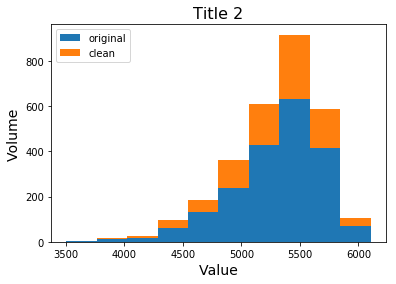

In [21]:
# create dataframe, select columns
df1x = deuc_o# df1["Value"]
df2x = deuc_c # df2["Value"]
#Stack the data
plt.figure()
plt.hist([df1x, df2x], bins=10, stacked=True)
plt.title('Title 2', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(['original', 'clean'])
plt.show()

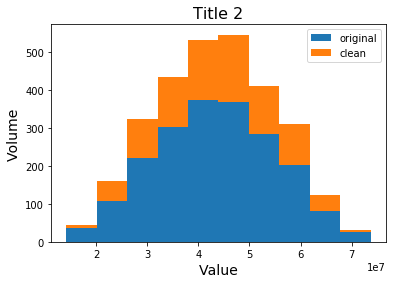

In [25]:
# create dataframe, select columns
df1x = dman_o# df1["Value"]
df2x = dman_c # df2["Value"]
#Stack the data
plt.figure()
plt.hist([df1x,df2x], bins=10, stacked=True)
plt.title('Title 2', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(['original', 'clean'])
plt.show()

In [36]:


ips = glob(os.path.join(i_p, '*_fmd.png'))
lps = glob(os.path.join(l_p, '*_cb.png'))

ops = []
mps = []

ils = np.empty((0,) + (512, 2*512, 4))
for i in ips:
    f_name = i.split('/')[-1].split('_fmd.png')[0]
    if f_name.split('_')[-1] == 'mirror': continue
    
    # detect label data
    if len(glob(os.path.join(l_p, f_name + '*_cb.png'))) == 0:
        print('No label detected for file %s' %f_name)
        continue

    print('Processing file: %s' %i)
    im = cv2.imread(i, cv2.IMREAD_UNCHANGED)
    lb = cv2.imread(os.path.join(l_p, f_name + '_cb.png'), cv2.IMREAD_UNCHANGED)
    il = np.hstack((im, lb))
    ils = np.append(ils, il.reshape((1,) + il.shape), axis=0)
#   rebuild with hsplit

Processing file: ../output/preprocessed_input/2652089249_1_fmd.png
Processing file: ../output/preprocessed_input/2702543812_1_fmd.png
Processing file: ../output/preprocessed_input/2719464221_1_fmd.png
Processing file: ../output/preprocessed_input/2761106136_1_fmd.png
Processing file: ../output/preprocessed_input/2822983493_3_fmd.png
Processing file: ../output/preprocessed_input/2876924522_1_fmd.png
Processing file: ../output/preprocessed_input/2891449285_1_fmd.png
Processing file: ../output/preprocessed_input/2934932210_1_fmd.png
Processing file: ../output/preprocessed_input/2939732721_1_fmd.png
Processing file: ../output/preprocessed_input/2943360326_1_fmd.png
Processing file: ../output/preprocessed_input/2959228565_1_fmd.png


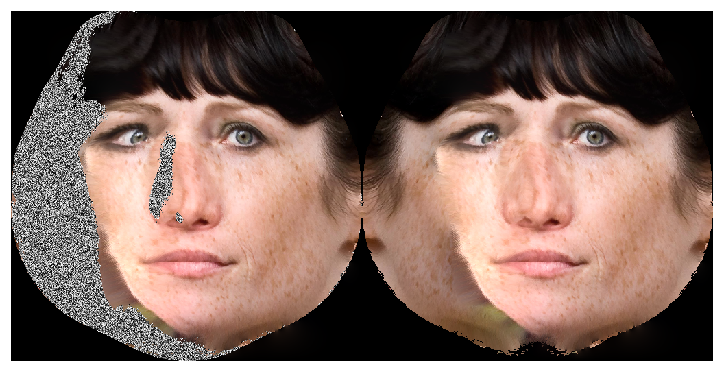

In [46]:
plot_im(ils[0][:,:,:3])

In [7]:
i_p = '/Users/blanca.alonso/data/isomaps/'

sample_size = 10

lps = glob(os.path.join(i_p, "*.png"))

ops = []
mps = []

for i in lps:
    f_name = i.split('/')[-1].split('.')[0]
    
    if f_name.split('_')[-1] != 'mirror': 
        op = i
        mp = i.split('.isomap.png')[0] + '_mirror.isomap.png'
#         print(op, mp)
        if len(glob(mp)) == 0: 
            print("No mirror detected")
            continue
        else: 
            ops.append(op)
            mps.append(mp)

print(len(ops), len(mps))

dts = []
for i, j in zip(ops, mps):
    im_o = cv2.imread(i)
    im_m = cv2.imread(j)

    dist = np.linalg.norm(im_o-im_m)
    dts.append(dist)
    
print(len(dts))

# from scipy.spatial import distance
# a = (1,2,3)
# b = (4,5,6)
# dst = distance.euclidean(a,b)

# def dist(x,y):   
#     return numpy.sqrt(numpy.sum((x-y)**2))

# a = numpy.array((xa,ya,za))
# b = numpy.array((xb,yb,zb))
# dist_a_b = dist(a,b)


# import numpy as np
# import matplotlib as plt
# a = np.array([1,2,3])
# b = np.array([2,3,4])
# # distance between a and b
# dis = plt.mlab.dist(a,b)

# distance = np.sqrt(np.sum((a-b)**2))

# from math import sqrt
# a = (1,2,3) #data point 1
# b = (4,5,6) #data point 2
# print (sqrt(sum((a - b)**2 for a, b in zip(im_o, im_m))))

68 68
68


In [13]:
import matplotlib
import numpy
import perfplot
from scipy.spatial import distance


def linalg_norm(data):
    a, b = data
    return numpy.linalg.norm(a-b, axis=1)


def sqrt_sum(data):
    a, b = data
    return numpy.sqrt(numpy.sum((a-b)**2, axis=1))


def scipy_distance(data):
    a, b = data
    return map(distance.euclidean, a, b)


def mpl_dist(data):
    a, b = data
    return map(matplotlib.mlab.dist, a, b)


def sqrt_einsum(data):
    a, b = data
    return numpy.einsum('ij,ij->i', a-b, a-b)**0.5


perfplot.show(
    setup=lambda n: numpy.random.rand(2, n, 3),
    n_range=[2**k for k in range(15)],
    kernels=[linalg_norm, scipy_distance, mpl_dist, sqrt_sum, sqrt_einsum],
    logx=True,
    logy=True,
#     xlabel='len(x), len(y)'
    )

  0%|          | 0/5 [00:00<?, ?it/s]



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [14]:
from math import*
from decimal import Decimal
 
class Similarity():
 
    """ Five similarity measures function """
 
    def euclidean_distance(self,x,y):
 
        """ return euclidean distance between two lists """
 
        return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
 
    def manhattan_distance(self,x,y):
 
        """ return manhattan distance between two lists """
 
        return sum(abs(a-b) for a,b in zip(x,y))
 
    def minkowski_distance(self,x,y,p_value):
 
        """ return minkowski distance between two lists """
 
        return self.nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),
           p_value)
 
    def nth_root(self,value, n_root):
 
        """ returns the n_root of an value """
 
        root_value = 1/float(n_root)
        return round (Decimal(value) ** Decimal(root_value),3)
 
    def cosine_similarity(self,x,y):
 
        """ return cosine similarity between two lists """
 
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = self.square_rooted(x)*self.square_rooted(y)
        return round(numerator/float(denominator),3)
 
    def square_rooted(self,x):
 
        """ return 3 rounded square rooted value """
 
        return round(sqrt(sum([a*a for a in x])),3)
 
    def jaccard_similarity(self,x,y):
#     """ returns the jaccard similarity between two lists """
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)


In [16]:
# !jupyter nbconvert --to script dp_mask_contour_and_fill_missing_data.ipynb